# Utilizing machine learning algorithms to predict CO2 emissions from vehicle features in the UK

Meriam Saad Kharchef


## MSc Big Data Science - Final Project

## In this notebook, I will Implement the the data cleaning pre proccesing and correlation analysis

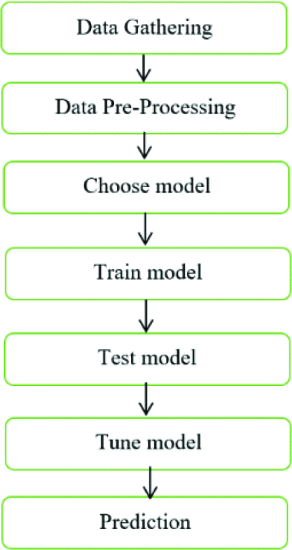

# Combining UK GOV Data from 2019 to 2023 and Adding new feature "Year" which describes the year the data was taken from

In [1]:
import pandas as pd

# Read the first CSV file and add a "Year" column filled with "2022"
df1 = pd.read_csv("2022.csv", encoding="ISO-8859-1")
df1['Year'] = 2022

# Read the second CSV file and add a "Year" column filled with "2023"
df2 = pd.read_csv("2022.csv", encoding="ISO-8859-1")
df2['Year'] = 2023

# Combine the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame as a new CSV file
combined_df.to_csv("combined_2022_2023.csv", index=False)



In [2]:
import pandas as pd

# Read the 2021 CSV file and add a "Year" column filled with "2021"
df3 = pd.read_csv("2021.csv", encoding="ISO-8859-1")
df3['Year'] = 2021

# Combine df3 with the existing combined_df DataFrame
combined_df = pd.concat([combined_df, df3], ignore_index=True)

# Save the newly combined DataFrame as a new CSV file
combined_df.to_csv("combined_2021_2022_2023.csv", index=False)


In [3]:
# Read the 2020 CSV file (assuming it's named "2020.csv") and add a "Year" column filled with "2020"
df2020 = pd.read_csv("2020.csv", encoding="ISO-8859-1")
df2020['Year'] = 2020

# Combine df2020 with the existing combined_df
combined_df = pd.concat([combined_df, df2020], ignore_index=True)

# Save the newly combined DataFrame as a new CSV file
combined_df.to_csv("combined_2020_2021_2022_2023.csv", index=False)


In [5]:
import pandas as pd


# Read the 2019 CSV file (let's assume it's named "2019.csv") and add a "Year" column filled with "2019"
df2019 = pd.read_csv("2019.csv", encoding="ISO-8859-1")
df2019['Year'] = 2019

# Combine df2019 with the existing combined_df
combined_df = pd.concat([combined_df, df2019], ignore_index=True)

# Save the newly combined DataFrame as a new CSV file
combined_df.to_csv("combined_2019_to_2023.csv", index=False)

# Data Cleaning, pre processing and checking for outliers

# importing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


loading the data

In [11]:
# Load the data into a DataFrame
df = pd.read_csv('combined_2019_to_2023.csv', encoding="ISO-8859-1")


Take an initial look at the data to understand its structure, missing values, and data types.

In [12]:
# Display the first few rows of the DataFrame
df.head()


,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),WLTP CO2,Year
0,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
1,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
2,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
3,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
4,ABARTH,595,595 1.4 TJET 145bhp,M5,1368,Petrol,Internal Combustion Engine (ICE),NaN,153.0,2022


Checking for missing values in the columns

In [13]:
# Check for missing values in each column
df.isnull().sum()


Manufacturer           0
Model                  0
Description            0
Transmission         722
Engine Capacity        0
Fuel Type              0
Powertrain             1
Engine Power (PS)    620
WLTP CO2              54
Year                   0
dtype: int64

### First we are going to replcae the missing powertrain values according to the fuel type

for example :   if fuel type is diesel or petrol = Internal Combustion Engine (ICE)                                                                   

and if fuel type = Petrol Hybrid then replace the powertrtain to Hybrid Electric Vehicle (HEV) and so on  

In [14]:
def set_powertrain(row):
    fuel_type = row['Fuel Type']
    powertrain = row['Powertrain']

    if pd.isnull(powertrain):
        if fuel_type == 'Diesel' or fuel_type == 'Petrol':
            return 'Internal Combustion Engine (ICE)'
        elif fuel_type == 'Petrol Hybrid':
            return 'Hybrid Electric Vehicle (HEV)'
        elif fuel_type == 'Electricity / Petrol':
            return 'Plug-in Hybrid Electric Vehicle (PHEV)'
        elif fuel_type == 'Electricity / Diesel':
            return 'Plug-in Hybrid Electric Vehicle (PHEV)'
        elif fuel_type == 'Electricity':
            return 'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)'
        elif fuel_type == 'Diesel Electric':
            return 'Mild Hybrid Electric Vehicle (MHEV)'
        else:
            return 'Unknown'
    else:
        return powertrain


In [18]:
df['Powertrain'] = df.apply(set_powertrain, axis=1)


In [19]:
df.head()


,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),WLTP CO2,Year
0,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
1,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
2,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
3,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
4,ABARTH,595,595 1.4 TJET 145bhp,M5,1368,Petrol,Internal Combustion Engine (ICE),NaN,153.0,2022


In [17]:
# Check for missing values in each column
df.isnull().sum()


Manufacturer           0
Model                  0
Description            0
Transmission         722
Engine Capacity        0
Fuel Type              0
Powertrain             0
Engine Power (PS)    620
WLTP CO2              54
Year                   0
dtype: int64

# Checking for outliers

### Because Fully electric vehicle CO2 emissions are all 0 across all data sets i will make sure that every electric vehicle co2 emission is set to 0 to remove outliers

In [104]:
#import pandas as pd
# Set WLTP CO2 to 0 where Fuel Type is "Electricity"
#df.loc[df['Fuel Type'] == 'Electricity', 'WLTP CO2'] = 0

# Verify that the change has been made
#print(df[df['Fuel Type'] == 'Electricity'])

      Manufacturer           Model                                Description  \
256        CITROEN          New C4  100kW Electric Vehicle with 50kWh battery   
257        CITROEN          New C4  100kW Electric Vehicle with 50kWh battery   
270        CITROEN     SpaceTourer                     50KWh Electric Vehicle   
271        CITROEN     SpaceTourer                     50KWh Electric Vehicle   
698             DS  DS 3 CROSSBACK                                    E-TENSE   
...            ...             ...                                        ...   
24044        TESLA         Model X                                       P90D   
24045        TESLA         Model X                        Performance (XA3EP)   
24046        TESLA         Model X                           Standard (XA1EB)   
24301   VOLKSWAGEN            Golf                                      eGolf   
24302   VOLKSWAGEN              UP                                       e-UP   

      Transmission  Engine 

# Checcking for outliers in WLTP CO2 emissions column

Checking the rage of values in Our CO2 emissoins column

In [20]:
# Check the range of WLTP CO2 values
min_value = df['WLTP CO2'].min()
max_value = df['WLTP CO2'].max()

print(f"The range of WLTP CO2 values is from {min_value} to {max_value}.")

The range of WLTP CO2 values is from 0.0 to 2019.0.


a value like 2019.0 (presumably in grams per kilometer) is extremely high for a light vehicle under WLTP norms. This could be an outlier or another data entry error. so now im going to view which row is showing this values  so it must be chaged or removed i will change it 200 as when cross checking with reliable online sources suggest that it should be set to 200

In [21]:
# Find rows where WLTP_CO2 is 2019
outliers_2019 =df[df['WLTP CO2'] == 2019]

# Display those rows
print("Rows where WLTP_CO2 is 2019:")
print(outliers_2019)


Rows where WLTP_CO2 is 2019:
      Manufacturer    Model                                Description  \
15978   ALFA ROMEO  Stelvio  2.0 Turbo petrol 280hp AWD VELOCE (206kw)   

      Transmission  Engine Capacity Fuel Type  \
15978           A8             1995    Petrol   

                             Powertrain  Engine Power (PS)  WLTP CO2  Year  
15978  Internal Combustion Engine (ICE)              280.0    2019.0  2020  


it shows that the vehicle Alfa romeo in row 15978 is cauing this strange value now its time to alter the value to cars with simialr charachtersitcs

In [22]:
# Replace the outlier value with 200
df.loc[15978, 'WLTP CO2'] = 200

# Verify that the replacement was successful
print(df.loc[15978])


Manufacturer                                        ALFA ROMEO
Model                                                  Stelvio
Description          2.0 Turbo petrol 280hp AWD VELOCE (206kw)
Transmission                                                A8
Engine Capacity                                           1995
Fuel Type                                               Petrol
Powertrain                    Internal Combustion Engine (ICE)
Engine Power (PS)                                        280.0
WLTP CO2                                                 200.0
Year                                                      2020
Name: 15978, dtype: object


now checkking the range of our WLTP CO2 column

In [23]:
# Check the range of WLTP CO2 values
min_value = df['WLTP CO2'].min()
max_value = df['WLTP CO2'].max()

print(f"The range of WLTP CO2 values is from {min_value} to {max_value}.")

The range of WLTP CO2 values is from 0.0 to 384.0.


In [24]:
df.to_csv('combined_2019_to_2023_view.csv', index=False)

## cleaning and preproccessing remaining columns


For 'Transmission':

 'Transmission' is a categorical variable, so we might choose to replace missing values with the mode (most frequently occurring value).

In [25]:
# Replace NaNs in 'Transmission' with the mode of the column
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)


For 'Engine Power (PS)':

For numerical values like engine power, we might use the mean or median.

In [26]:
# Replace NaNs in 'Engine Power (PS)' with the median of the column
df['Engine Power (PS)'].fillna(df['Engine Power (PS)'].median(), inplace=True)


For 'WLTP CO2':
Again, for numerical values, we can use mean, median, or even a predefined constant.

In [27]:
# Replace NaNs in 'WLTP CO2' with the median of the column
df['WLTP CO2'].fillna(df['WLTP CO2'].median(), inplace=True)


now lets if our data is free form missing values

In [28]:
df.isnull().sum()


Manufacturer         0
Model                0
Description          0
Transmission         0
Engine Capacity      0
Fuel Type            0
Powertrain           0
Engine Power (PS)    0
WLTP CO2             0
Year                 0
dtype: int64

#display rows where any cell has a NaN value

## Check for any unusual values in the target column

In [29]:
# Importing pandas
import pandas as pd

# Assume df is your DataFrame
print(df['WLTP CO2'].describe())


count    26256.000000
mean       158.448088
std         54.069169
min          0.000000
25%        133.000000
50%        154.000000
75%        182.000000
max        384.000000
Name: WLTP CO2, dtype: float64


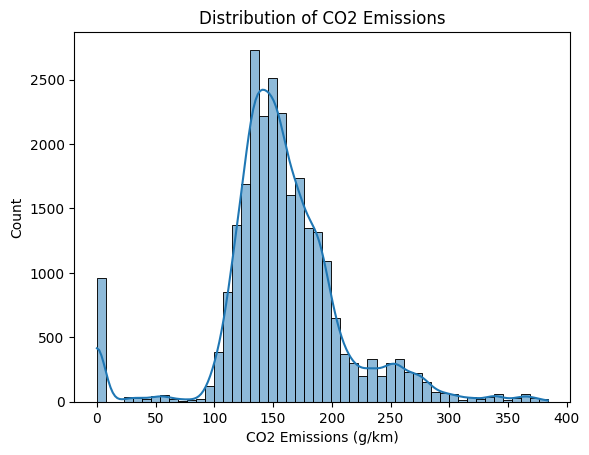

In [30]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.histplot(df['WLTP CO2'], bins=50, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.show()


In [31]:
from scipy.stats import skew, kurtosis

print("Skewness: ", skew(df['WLTP CO2'].dropna()))
print("Kurtosis: ", kurtosis(df['WLTP CO2'].dropna()))


Skewness:  0.060793794378363616
Kurtosis:  2.974807105796332


from the plot and the above calculations Both of the measures suggest that the WLTP CO2 values in our dataset are reasonably well-distributed, although the kurtosis suggests that we might expect to see slightly more outliers than in a perfectly normal distribution.

Skewness:  0.03372192369283485

Kurtosis:  2.929612607454567

When predicting CO2 emissions, having a balanced distribution in the target variable ensures that the model learns the complex relationships between various vehicle features and emissions across the whole range of vehicles and conditions. It helps in creating a model that is not only accurate but also robust and interpretable, thereby allowing for better insights and decision-making related to environmental impacts, regulations, and vehicle design.


# we have to identiify outliers

# Saving the cleaned data into our new csv file

In [32]:
# Save the DataFrame to a CSV file
df.to_csv('UK_gov_cleaned_data.csv', index=False)


# COrrelation Analysis

# Correlation between CO2 emission and Continous features

the best approach to corrlate between co2 emissions and numirical  or continous features is to preform pearson correlation

# imports

In [33]:
import pandas as pd
from scipy.stats import pearsonr

In [34]:
import pandas as pd
from scipy.stats import pearsonr

# Load the data
df = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")

df.head()

,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),WLTP CO2,Year
0,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
1,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
2,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
3,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
4,ABARTH,595,595 1.4 TJET 145bhp,M5,1368,Petrol,Internal Combustion Engine (ICE),150.0,153.0,2022


In [35]:
# Calculate Pearson correlation and the p-value
corr, p_value = pearsonr(df['WLTP CO2'], df['Engine Capacity'])

print(f"Pearson correlation: {corr}, p-value: {p_value}")

Pearson correlation: 0.7332528495154386, p-value: 0.0


# Plotting to visualise the relation between engine size and co2 emission

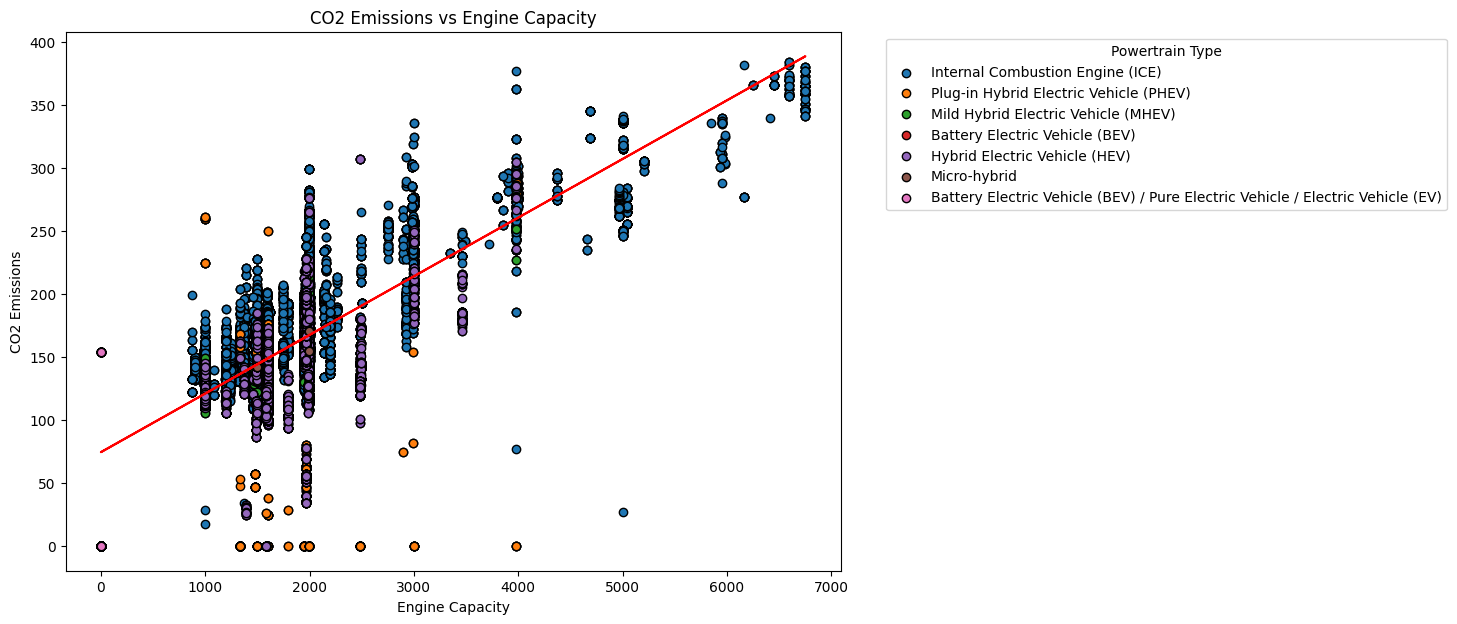

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))  # Adjust these values to change the size of the plot

# Assuming 'powertrain' is the name of your column with vehicle types
for powertrain_type in df['Powertrain'].unique():
    plt.scatter(df[df['Powertrain'] == powertrain_type]['Engine Capacity'],
                df[df['Powertrain'] == powertrain_type]['WLTP CO2'],
                edgecolors='black',
                label=powertrain_type)

# Calculate the coefficients for the line of best fit
m, b = np.polyfit(df['Engine Capacity'], df['WLTP CO2'], 1)

# Add the line of best fit to the plot
plt.plot(df['Engine Capacity'], m*df['Engine Capacity'] + b, color='red')

plt.title('CO2 Emissions vs Engine Capacity')  # Add a title to the plot
plt.xlabel('Engine Capacity')  # Add a label to the x-axis
plt.ylabel('CO2 Emissions')  # Add a label to the y-axis

# Add a legend to the plot with customized settings
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Powertrain Type')

plt.show()  # Display the plot

# Correlation between CO2 emissions and Engine Power (PS) of the vehicles

the Pearson correlation coefficient does indeed have a mathematical formula. The formula for the Pearson correlation coefficient (r) between two variables X and Y, where each variable has n data points, is:

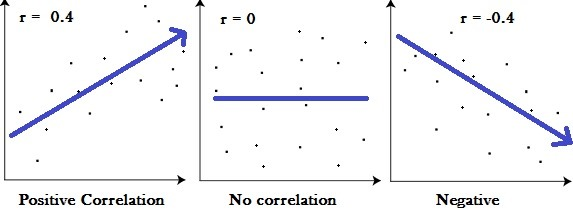

In this formula:

Σxy is the sum of the products of the corresponding values of the X and Y.

Σx and Σy are the sums of the X and Y values respectively.

Σx² and Σy² are the sums of the squares of the X and Y values respectively.

(Σx)² and (Σy)² are the squares of the sum of X and sum of Y respectively.

The Pearson correlation coefficient measures the linear relationship between two datasets. The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.

0: No linear correlation. The two variables likely do not affect each other.

-1: Total negative linear correlation.

However, in most practical cases, you wouldn't calculate the Pearson correlation by hand but would use a software or programming language function, such as the pearsonr function from the scipy.stats module in Python, which computes both the correlation and the p-value for testing the hypothesis that the correlation is different from 0 (no correlation).

Calculating the correlation by using pearson coorrelation theorum

In [37]:
# Calculate Pearson correlation and the p-value
corr, p_value = pearsonr(df['WLTP CO2'], df['Engine Power (PS)'])

print(f"Pearson correlation: {corr}, p-value: {p_value}")

Pearson correlation: 0.5802155065308341, p-value: 0.0


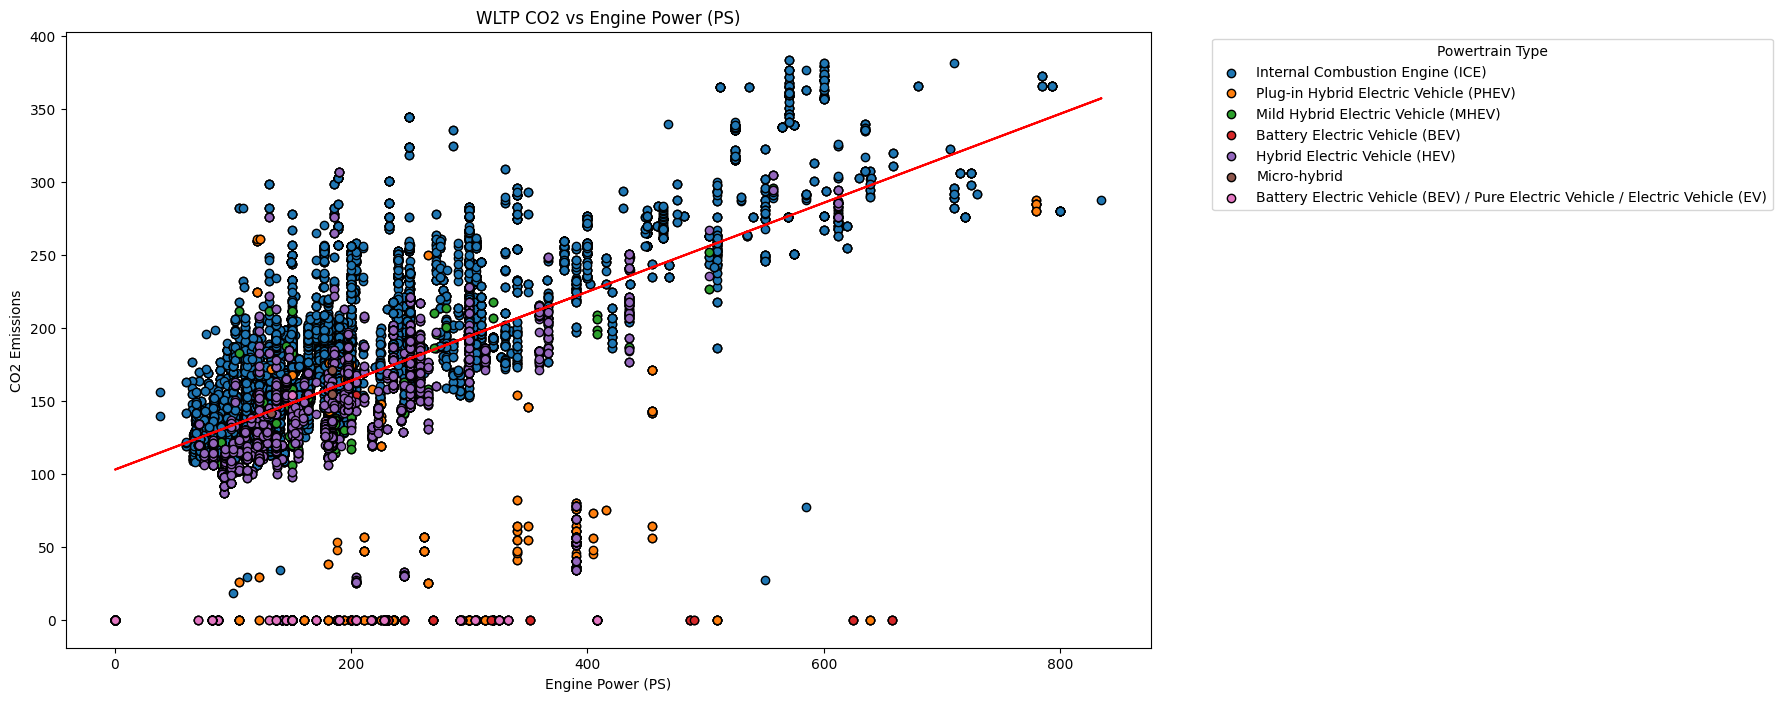

In [38]:
plt.figure(figsize=(14, 8))  # Adjust these values to change the size of the plot

# Assuming 'powertrain' is the name of your column with vehicle types
for powertrain_type in df['Powertrain'].unique():
    plt.scatter(df[df['Powertrain'] == powertrain_type]['Engine Power (PS)'],
                df[df['Powertrain'] == powertrain_type]['WLTP CO2'],
                edgecolors='black',
                label=powertrain_type)

# Calculate the coefficients for the line of best fit
m, b = np.polyfit(df['Engine Power (PS)'], df['WLTP CO2'], 1)

# Add the line of best fit to the plot
plt.plot(df['Engine Power (PS)'], m*df['Engine Power (PS)'] + b, color='red')

plt.title('WLTP CO2 vs Engine Power (PS)')  # Add a title to the plot
plt.xlabel('Engine Power (PS)')  # Add a label to the x-axis
plt.ylabel('CO2 Emissions')  # Add a label to the y-axis

# Add a legend to the plot with customized settings
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Powertrain Type')

plt.show()  # Display the plot


# other plot made by plotly

In [40]:
import plotly.express as px
import pandas as pd

# Load the data
df = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")


# Interactive scatter plot for Engine Capacity vs CO2 emissions
fig1 = px.scatter(df, x='Engine Capacity', y='WLTP CO2', title='Engine Capacity vs CO2 Emissions')
fig1.show()

# Interactive scatter plot for Engine Power vs CO2 emissions
fig2 = px.scatter(df, x='Engine Power (PS)', y='WLTP CO2', title='Engine Power vs CO2 Emissions')
fig2.show()

# Correlation between CO2 emission and catigorical features

## Corrlation between co2 emissions and Fuel

Now because in my data fuel is a catigorical data (contains non numirical values) and Co2 emission is a numirical value pearsons correlation wont be the suitable solution to analyse the coreelation between co2 emissions and Fuel

but there is another statsical method know as ANOVA

### ANOVA

## how ANOVA works
there are any statistically significant differences among the means of the groups defined by the unique fuel types in the Powertrain column. Specifically, it's looking at the differences in CO2 emissions among the different fuel types.

The formula for the F-value in one-way ANOVA is:




$$ F = \frac{{\text{{Between-group variability}}}}{{\text{{Within-group variability}}}} $$



1- Between-group variability: This is a measure of how much the means of each group differ from the overall mean of the data. It's calculated as:

$$ \text{{Between-group variability}} = \sum_{i=1}^{k} n_i \left( \bar{x_i} - \bar{x} \right)^2 $$

where k is the number of groups, ni is the number of observations in group i, ˉxi is the mean of group i, and ˉx is the overall mean.




2- This measures how much the individual observations within each group vary from the mean of that group. It's calculated as:





$$ \text{{Within-group variability}} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} \left( x_{ij} - \bar{x_i} \right)^2 $$


where xij is the j-th observation in group i.



In [41]:
import pandas as pd
from scipy.stats import pearsonr

# Load the data
df = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")

df.head()

,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),WLTP CO2,Year
0,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
1,ABARTH,595,595 1.4 145 BHP Convertible,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
2,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,162.0,2022
3,ABARTH,595,595 1.4 145 BHP Hatchback,M5,1368,Petrol,Internal Combustion Engine (ICE),145.0,169.0,2022
4,ABARTH,595,595 1.4 TJET 145bhp,M5,1368,Petrol,Internal Combustion Engine (ICE),150.0,153.0,2022


In [42]:
import scipy.stats as stats

# Get the unique fuel types
fuel_types = df['Fuel Type'].unique()

# Create a list of CO2 emissions for each fuel type
emissions_by_fuel_type = [df['WLTP CO2'][df['Fuel Type'] == fuel] for fuel in fuel_types]

# Perform ANOVA
fvalue, pvalue = stats.f_oneway(*emissions_by_fuel_type)

print(f'F-value: {fvalue}, p-value: {pvalue}')


F-value: 1648.8366057312307, p-value: 0.0


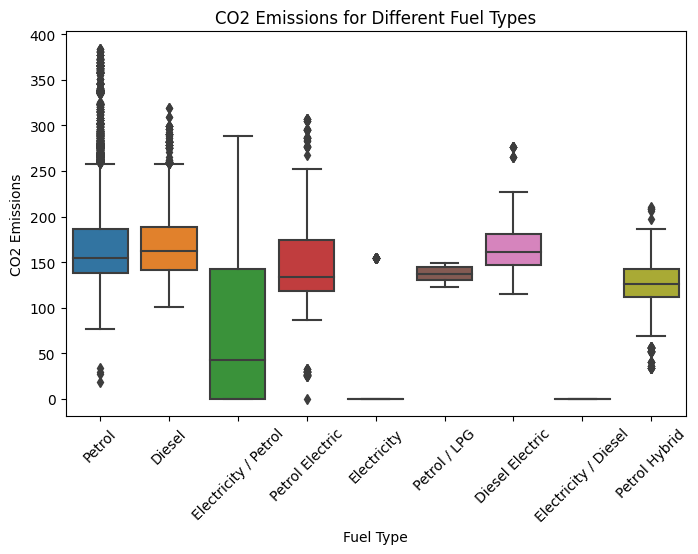

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Create a boxplot
sns.boxplot(x='Fuel Type', y='WLTP CO2', data=df)

plt.title('CO2 Emissions for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45)  # Add this line to rotate your x-axis labels

plt.show()


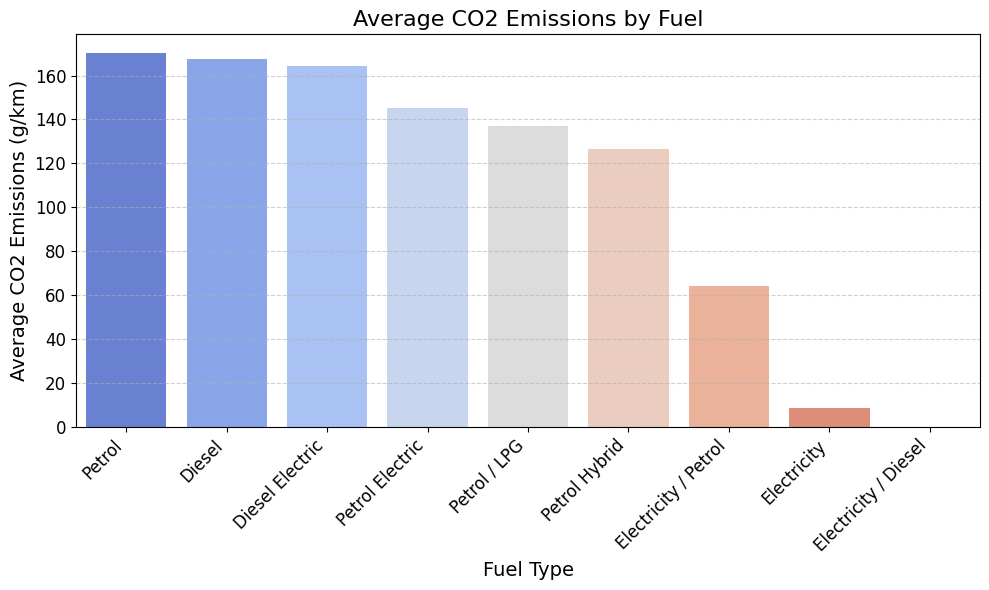

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



avg_emissions_by_fuel = df.groupby("Fuel Type")["WLTP CO2"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_emissions_by_fuel.index, y=avg_emissions_by_fuel.values, palette="coolwarm")
plt.ylabel('Average CO2 Emissions (g/km)', fontsize=14)
plt.xlabel('Fuel Type', fontsize=14)
plt.title('Average CO2 Emissions by Fuel', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Co2 emission correlation with viehvle type (power train)

In [45]:
import scipy.stats as stats

# Get the unique fuel types
fuel_types = df['Powertrain'].unique()

# Create a list of CO2 emissions for each fuel type
emissions_by_fuel_type = [df['WLTP CO2'][df['Powertrain'] == fuel] for fuel in fuel_types]

# Perform ANOVA
fvalue, pvalue = stats.f_oneway(*emissions_by_fuel_type)

print(f'F-value: {fvalue}, p-value: {pvalue}')

F-value: 2141.333432858623, p-value: 0.0


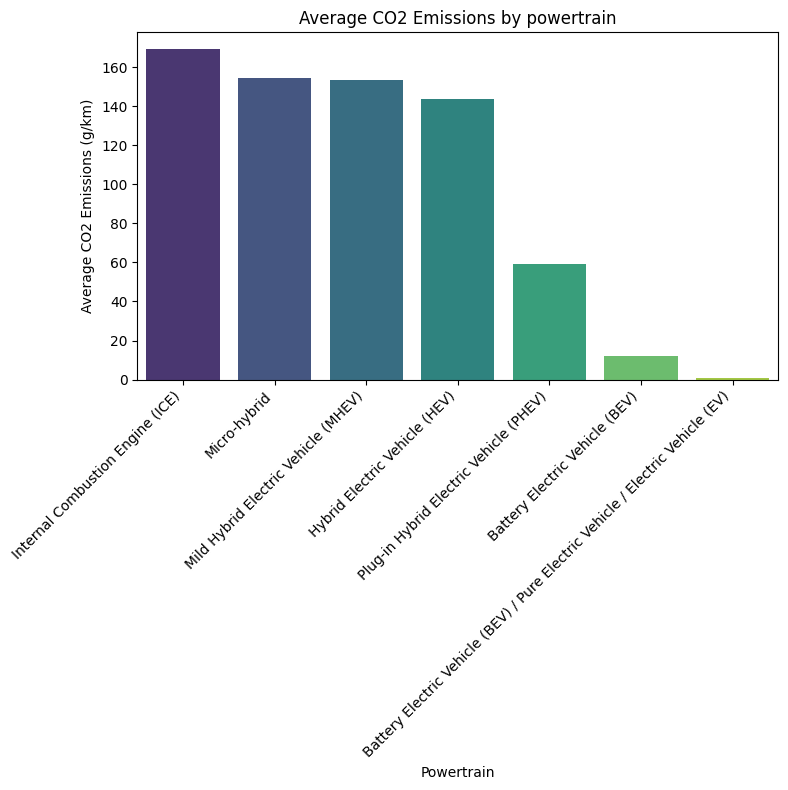

In [46]:
# Assuming you have pandas and matplotlib imported and your dataframe is named df
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_emissions_by_powertrain = df.groupby("Powertrain")["WLTP CO2"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(x=avg_emissions_by_powertrain.index, y=avg_emissions_by_powertrain.values, palette="viridis")
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xlabel('Powertrain')
plt.title('Average CO2 Emissions by powertrain')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# corellation between co2 emissoin and Manufacturer

In [47]:
import scipy.stats as stats

# Get the unique fuel types
fuel_types = df['Manufacturer'].unique()

# Create a list of CO2 emissions for each fuel type
emissions_by_fuel_type = [df['WLTP CO2'][df['Manufacturer'] == fuel] for fuel in fuel_types]

# Perform ANOVA
fvalue, pvalue = stats.f_oneway(*emissions_by_fuel_type)

print(f'F-value: {fvalue}, p-value: {pvalue}')

F-value: 350.7122326800291, p-value: 0.0


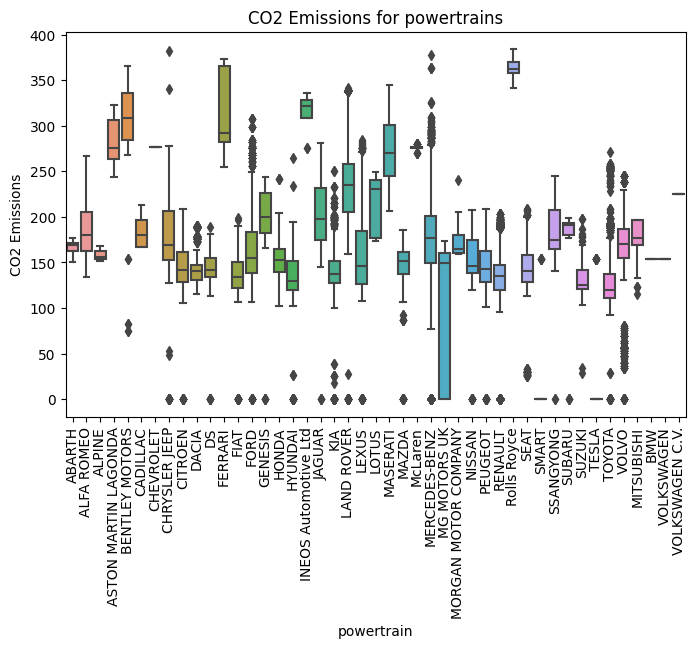

In [48]:
plt.figure(figsize=(8, 5))

# Create a boxplot
sns.boxplot(x='Manufacturer', y='WLTP CO2', data=df)

plt.title('CO2 Emissions for powertrains')
plt.xlabel('powertrain')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=90)  # Add this line to rotate your x-axis labels

plt.show()

## average CO2 Emissions by manufacturer

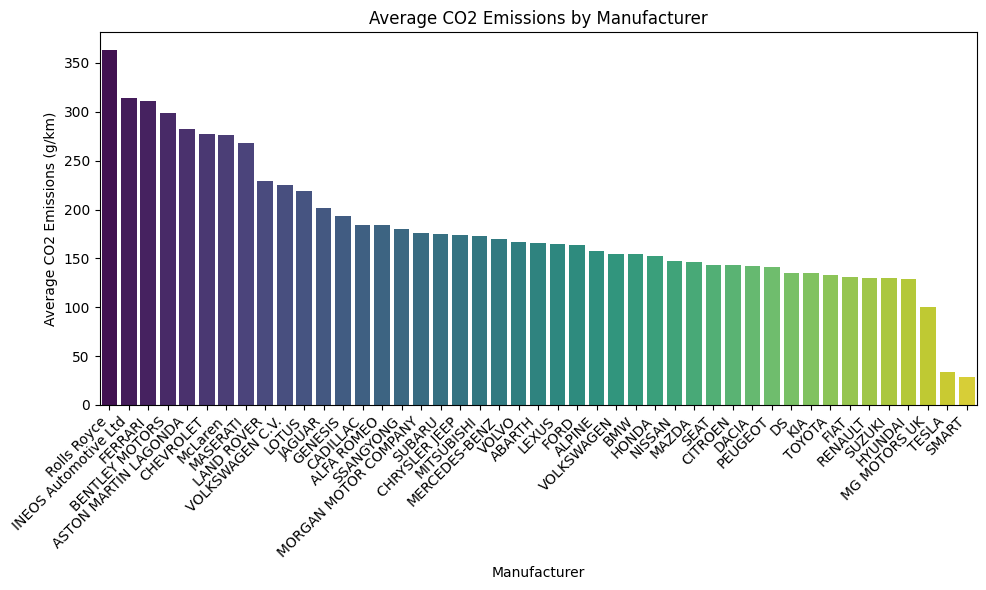

In [49]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_emissions_by_manufacturer = df.groupby("Manufacturer")["WLTP CO2"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_emissions_by_manufacturer.index, y=avg_emissions_by_manufacturer.values, palette="viridis")
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xlabel('Manufacturer')
plt.title('Average CO2 Emissions by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Correlation matrix

we can check the correlations between numerical features and the target variable (WLTP CO2).

For non-numerical columns, we need to encode them to numerical values to explore correlations

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('UK_gov_cleaned_data.csv')

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the 'Transmission' and 'Powertrain' columns
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data['Powertrain'] = label_encoder.fit_transform(data['Powertrain'])

# Calculate the correlation matrix
corr_matrix = data.corr()

# Print the correlation with WLTP CO2 (target variable)
print(corr_matrix['WLTP CO2'])


Transmission        -0.255502
Engine Capacity      0.733253
Powertrain           0.165076
Engine Power (PS)    0.580216
WLTP CO2             1.000000
Year                -0.140233
Name: WLTP CO2, dtype: float64


<ipython-input-1-88b3a903d4c9>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


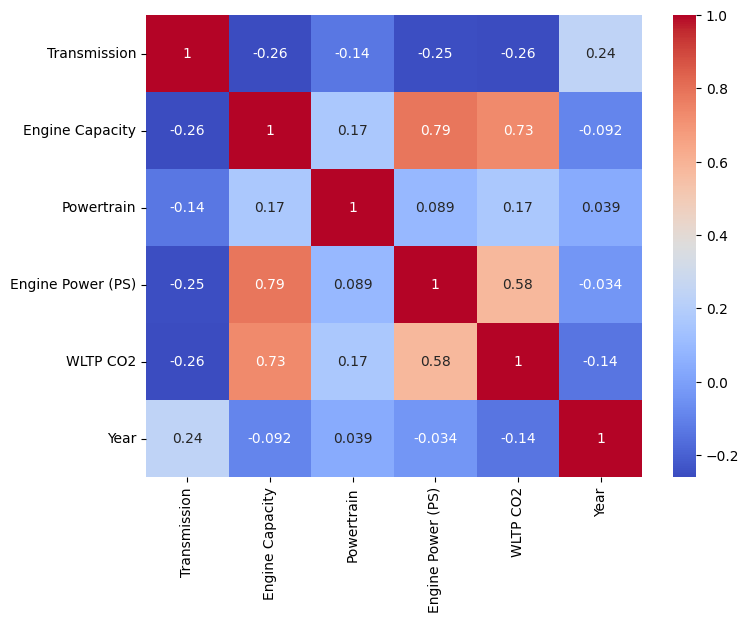

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# Statistical analysis

In [50]:
# Summary Statistics
summary_statistics = df.describe()

print("Summary Statistics:")
print(summary_statistics)


Summary Statistics:
       Engine Capacity  Engine Power (PS)      WLTP CO2          Year
count     26256.000000       26256.000000  26256.000000  26256.000000
mean       1801.707534         182.022623    158.448088   2020.924284
std         852.048827         102.900499     54.069169      1.377534
min           0.000000           0.000000      0.000000   2019.000000
25%        1333.000000         120.000000    133.000000   2020.000000
50%        1798.000000         150.000000    154.000000   2021.000000
75%        1995.000000         197.000000    182.000000   2022.000000
max        6752.000000         835.000000    384.000000   2023.000000


In [51]:
# Frequency of each unique value for a categorical column like 'Manufacturer'
manufacturer_counts = df['Manufacturer'].value_counts()
print("Manufacturer Counts:")
print(manufacturer_counts)


Manufacturer Counts:
VOLVO                   3491
RENAULT                 2617
HONDA                   2485
MERCEDES-BENZ           2195
FORD                    1639
TOYOTA                  1508
KIA                     1410
LAND ROVER              1286
MAZDA                   1209
DACIA                   1158
SEAT                     951
LEXUS                    870
PEUGEOT                  698
FIAT                     598
JAGUAR                   544
CITROEN                  476
HYUNDAI                  463
CHRYSLER JEEP            426
ALFA ROMEO               248
NISSAN                   231
ABARTH                   226
SUZUKI                   202
MASERATI                 155
SSANGYONG                122
GENESIS                  112
Rolls Royce              112
MG MOTORS UK              94
DS                        93
ALPINE                    92
ASTON MARTIN LAGONDA      77
BENTLEY MOTORS            76
TESLA                     72
FERRARI                   60
McLaren               